# Linear Regression: 100 Models

## Experiment 1 : Bimodal Normal Distribtution (60k)

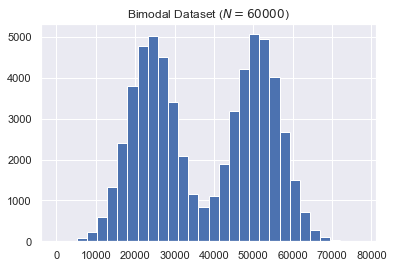

In [1]:
import pickle
import numpy as np

with open("bimodal60k.data", "rb") as f:
    dataset = pickle.load(f)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.hist(dataset[0], bins=30)
plt.title(f"Bimodal Dataset ($N = {len(dataset[0])}$)")
plt.show()

----
#### Computing Build Time

In [2]:
from sklearn.linear_model import LinearRegression
from cdf_interp.search import pinch_predict, exponential_search, informed_bsearch
from time import time

def model(data, numregressors):
    regressors = []
    idx = range(data.shape[0])
    length = len(data)
    for i in range(numregressors):
        start = int(i * length / numregressors)
        end = int((i + 1) * length / numregressors)

        X = np.array(data[start:end]).reshape(-1, 1)
        Y = np.asarray(idx[start:end])

        regr = LinearRegression()
        regr.fit(X, Y)

        regressors.append((X[-1], regr.predict))
    
    return regressors

def piecewisepredict(regressors):
    def inner(x):
        for up, predict in regressors:
            if x <= up:
                return predict([[x]])[0]
    return inner

t0 = time()
data = dataset[0,:]
regressors = model(data, 100)
predict = pinch_predict(data, piecewisepredict(regressors))
es = exponential_search(data, predict)
bs = informed_bsearch(data, predict)
t1 = time()
ols10_buildtime = t1-t0
print(f"100 Lin Reg Build Time: {ols10_buildtime} sec")

100 Lin Reg Build Time: 0.03899669647216797 sec


-----------
#### Computing Query Time and Array Accesses

In [3]:
ols10_array_accesses = 0
N = dataset.shape[1]
from tqdm import tqdm
t0 = time()
for i in range(N):
    q = dataset[0,i,0]
    yhat = bs(q)
    ols10_array_accesses += yhat[1]
    running_avg = ols10_array_accesses / float(N)
t1 = time()
ols10_querytime = t1-t0
print(f"100 Lin Reg Query Time: {ols10_querytime / float(N)}")
print(f"100 Lin Reg Arr. Access: {running_avg}")

100 Lin Reg Query Time: 8.682092825571696e-05
100 Lin Reg Arr. Access: 14.556916666666666


-------
#### Computing Storage Cost

In [4]:
BYTES_PER_FLOAT = 8
NUM_FLOATS = 2 * 100 + 100
ols10_storage = BYTES_PER_FLOAT * NUM_FLOATS
print(f"100 Lin Reg Storage: {ols10_storage} B")

100 Lin Reg Storage: 2400 B


## Experiment 2: Mac OSX Log Timestamps (106k)

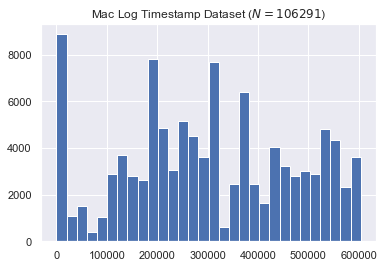

In [6]:
with open("mac117k.data", "rb") as f:
    dataset = pickle.load(f)
plt.hist(dataset[0], bins=30)
plt.title(f"Mac Log Timestamp Dataset ($N = {len(dataset[0])}$)")
plt.show()

----
#### Computing Build Time

In [7]:
from sklearn.linear_model import LinearRegression
from cdf_interp.search import pinch_predict, exponential_search, informed_bsearch
from time import time

def model(data, numregressors):
    regressors = []
    idx = range(data.shape[0])
    length = len(data)
    for i in range(numregressors):
        start = int(i * length / numregressors)
        end = int((i + 1) * length / numregressors)

        X = np.array(data[start:end]).reshape(-1, 1)
        Y = np.asarray(idx[start:end])

        regr = LinearRegression()
        regr.fit(X, Y)

        regressors.append((X[-1], regr.predict))
    
    return regressors

def piecewisepredict(regressors):
    def inner(x):
        for up, predict in regressors:
            if x <= up:
                return predict([[x]])[0]
    return inner

t0 = time()
data = dataset[0,:]
regressors = model(data, 100)
predict = pinch_predict(data, piecewisepredict(regressors))
es = exponential_search(data, predict)
bs = informed_bsearch(data, predict)
t1 = time()
ols10_buildtime = t1-t0
print(f"100 Lin Reg Build Time: {ols10_buildtime} sec")

100 Lin Reg Build Time: 0.03999662399291992 sec


-----------
#### Computing Query Time and Array Accesses

In [8]:
ols10_array_accesses = 0
N = dataset.shape[1]
from tqdm import tqdm
t0 = time()
for i in range(N):
    q = dataset[0,i,0]
    yhat = bs(q)
    ols10_array_accesses += yhat[1]
    running_avg = ols10_array_accesses / float(N)
t1 = time()
ols10_querytime = t1-t0
print(f"100 Lin Reg Query Time: {ols10_querytime / float(N)}")
print(f"100 Lin Reg Arr. Access: {running_avg}")

100 Lin Reg Query Time: 8.934821881181208e-05
100 Lin Reg Arr. Access: 15.049646724558054


-------
#### Computing Storage Cost

In [9]:
BYTES_PER_FLOAT = 8
NUM_FLOATS = 2 * 100 + 100
ols10_storage = BYTES_PER_FLOAT * NUM_FLOATS
print(f"100 Lin Reg Storage: {ols10_storage} B")

100 Lin Reg Storage: 2400 B
